In [1]:
import re
import glob
import math
import random
import pandas as pd
import numpy as np
np.bool = np.bool_
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as py
from sklearn import datasets
from scipy import stats
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
trainDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\10ppm\\df_train_dbMSIn10ppm4nonInDI_STDnorm.csv")
extDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\10ppm\\df_ext_dbMSIn10ppm4nonInDI_STDnorm.csv")
ingestedDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\10ppm\\df_ingested_dbMSIn10ppm4nonInDI_STDnorm.csv")
fnaDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\10ppm\\df_FNA_dbMSIn10ppm4nonInDI_STDnorm.csv")
diDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\10ppm\\df_nonInDI_dbMSIn10ppm4nonInDI_STDnorm.csv")

In [3]:
trainDEFSDf.describe()

,311.1684,269.2486,215.0328,277.2172,435.2965,309.1704,738.5066,241.2173,250.1449,295.2278,...,265.1478,794.5338,883.533,227.2016,233.1546,124.0072,602.4456,514.2846,867.5147,type
count,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,...,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,90960.000000
mean,6.905830e-14,-2.742124e-13,-2.003130e-15,4.585126e-15,3.057170e-14,4.671858e-14,-2.021756e-15,-8.575657e-14,-8.014746e-16,4.135633e-13,...,6.676168e-14,-1.831948e-14,8.608881e-15,-1.261125e-13,-2.689912e-14,-2.915687e-15,-3.960128e-14,-1.124105e-13,-4.496306e-14,0.478353
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499534
min,-1.115627e+00,-1.038074e+00,-4.018922e+00,-2.719110e+00,-1.829989e+00,-7.003967e-01,-2.907624e+00,-1.168553e+00,-3.678812e+00,-4.040682e-01,...,-7.350054e-01,-4.533536e-01,-2.479183e+00,-1.389786e+00,-2.683557e+00,-3.703691e+00,-1.176644e-01,-4.259520e-01,-4.426998e-01,0.000000
25%,-1.115627e+00,-1.038074e+00,-6.738569e-01,-6.859687e-01,-1.866616e-01,-7.003967e-01,-6.584687e-01,-1.168553e+00,-4.787165e-01,-4.040682e-01,...,-7.350054e-01,-4.533536e-01,-5.717361e-01,-1.389786e+00,-3.031918e-01,-5.692268e-01,-1.176644e-01,-4.259520e-01,-4.426998e-01,0.000000
50%,1.427182e-01,4.197145e-01,-1.232422e-01,7.806340e-02,3.046247e-01,-7.003967e-01,-1.024163e-01,4.387401e-01,1.993993e-04,-4.040682e-01,...,3.487826e-02,-4.533536e-01,-2.485778e-02,4.236915e-01,1.926056e-01,-8.301638e-03,-1.176644e-01,-4.259520e-01,-4.426998e-01,0.000000
75%,4.712010e-01,9.310511e-01,5.632891e-01,7.563959e-01,6.672909e-01,5.499721e-01,4.661853e-01,8.547447e-01,4.792894e-01,-4.040682e-01,...,4.014555e-01,-4.533536e-01,6.144220e-01,7.691061e-01,5.867808e-01,5.377273e-01,-1.176644e-01,-4.259520e-01,-4.426998e-01,1.000000
max,1.045356e+01,3.287925e+00,5.840004e+00,3.044272e+00,2.658040e+00,1.101243e+01,4.082047e+00,3.527857e+00,7.260323e+00,5.574995e+00,...,1.325060e+01,5.094139e+00,4.403822e+00,3.045227e+00,4.166471e+00,5.048296e+00,1.572428e+01,9.879716e+00,7.794002e+00,1.000000


In [4]:
trainDEFSDf

,pixel_id,311.1684,269.2486,215.0328,277.2172,435.2965,309.1704,738.5066,241.2173,250.1449,...,265.1478,794.5338,883.533,227.2016,233.1546,124.0072,602.4456,514.2846,867.5147,type
0,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.687726,0.568057,-1.174267,-0.396204,0.529319,4.502233,-1.001765,1.063677,1.380095,...,4.516408,-0.453354,-0.488411,0.707264,0.763448,-0.085210,-0.117664,-0.425952,-0.442700,0
1,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,5.100212,1.496236,-0.377348,-0.337222,0.260481,5.620431,-1.120449,1.372003,3.286912,...,5.492450,-0.453354,-0.288439,0.854702,1.669974,1.225312,-0.117664,-0.425952,-0.442700,0
2,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.445872,0.628390,-0.825027,-0.338485,-0.133034,3.713885,-1.053360,0.988516,2.284046,...,4.409207,-0.453354,-0.472931,0.999037,1.926641,-0.954524,-0.117664,-0.425952,-0.442700,0
3,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.196718,0.434454,-0.418413,-0.688982,-0.082019,3.502578,-1.000024,1.280699,2.047447,...,4.249314,1.738526,0.592190,0.580417,1.504607,-1.007959,-0.117664,-0.425952,1.825934,0
4,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,1.997115,0.757400,-1.300444,-0.716567,0.627675,2.567365,-1.021176,0.782820,1.036886,...,2.983452,-0.453354,-0.367406,0.733112,0.493555,-0.243213,-0.117664,-0.425952,-0.442700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.410525,-1.038074,0.041030,-0.878750,1.088504,0.737200,-1.400189,-1.168553,0.417574,...,0.504216,-0.453354,-0.926756,0.483292,0.701020,0.931225,-0.117664,2.184668,-0.442700,1
90956,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.252412,-1.038074,-0.899504,-0.994299,1.347635,0.869989,-1.340002,0.716735,2.304066,...,0.259997,-0.453354,-0.427607,0.487766,0.443162,-0.259778,-0.117664,-0.425952,-0.442700,1
90957,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.357466,1.260345,-0.920750,-0.918819,0.877777,0.521725,-0.798359,-1.168553,1.567573,...,-0.735005,-0.453354,-0.606650,0.618718,1.246264,0.181284,-0.117664,-0.425952,2.018798,1
90958,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.526576,-1.038074,-1.209441,-0.506793,0.670780,0.702305,-0.967547,-1.168553,2.067876,...,0.671902,-0.453354,-1.055427,0.576152,0.669682,-0.230168,-0.117664,-0.425952,-0.442700,1


In [5]:
def sns_heatmap(df):
    sns.heatmap(df, cmap="inferno", vmin=0, vmax=1.0)

In [6]:
trainDEFSDf = trainDEFSDf[trainDEFSDf.columns[1:-1]]
extDEFSDf = extDEFSDf[extDEFSDf.columns[1:-1]]
fnaDEFSDf = fnaDEFSDf[fnaDEFSDf.columns[1:-1]]
ingestedDEFSDf = ingestedDEFSDf[ingestedDEFSDf.columns[1:-1]]
diDEFSDf = diDEFSDf[diDEFSDf.columns[1:-1]]

In [7]:
trainDEFSDf

,311.1684,269.2486,215.0328,277.2172,435.2965,309.1704,738.5066,241.2173,250.1449,295.2278,...,339.1996,265.1478,794.5338,883.533,227.2016,233.1546,124.0072,602.4456,514.2846,867.5147
0,3.687726,0.568057,-1.174267,-0.396204,0.529319,4.502233,-1.001765,1.063677,1.380095,-0.404068,...,2.433572,4.516408,-0.453354,-0.488411,0.707264,0.763448,-0.085210,-0.117664,-0.425952,-0.442700
1,5.100212,1.496236,-0.377348,-0.337222,0.260481,5.620431,-1.120449,1.372003,3.286912,-0.404068,...,3.295371,5.492450,-0.453354,-0.288439,0.854702,1.669974,1.225312,-0.117664,-0.425952,-0.442700
2,3.445872,0.628390,-0.825027,-0.338485,-0.133034,3.713885,-1.053360,0.988516,2.284046,-0.404068,...,2.422182,4.409207,-0.453354,-0.472931,0.999037,1.926641,-0.954524,-0.117664,-0.425952,-0.442700
3,3.196718,0.434454,-0.418413,-0.688982,-0.082019,3.502578,-1.000024,1.280699,2.047447,-0.404068,...,2.330897,4.249314,1.738526,0.592190,0.580417,1.504607,-1.007959,-0.117664,-0.425952,1.825934
4,1.997115,0.757400,-1.300444,-0.716567,0.627675,2.567365,-1.021176,0.782820,1.036886,-0.404068,...,1.465057,2.983452,-0.453354,-0.367406,0.733112,0.493555,-0.243213,-0.117664,-0.425952,-0.442700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,0.410525,-1.038074,0.041030,-0.878750,1.088504,0.737200,-1.400189,-1.168553,0.417574,-0.404068,...,0.451784,0.504216,-0.453354,-0.926756,0.483292,0.701020,0.931225,-0.117664,2.184668,-0.442700
90956,0.252412,-1.038074,-0.899504,-0.994299,1.347635,0.869989,-1.340002,0.716735,2.304066,-0.404068,...,0.530955,0.259997,-0.453354,-0.427607,0.487766,0.443162,-0.259778,-0.117664,-0.425952,-0.442700
90957,0.357466,1.260345,-0.920750,-0.918819,0.877777,0.521725,-0.798359,-1.168553,1.567573,-0.404068,...,0.493763,-0.735005,-0.453354,-0.606650,0.618718,1.246264,0.181284,-0.117664,-0.425952,2.018798
90958,0.526576,-1.038074,-1.209441,-0.506793,0.670780,0.702305,-0.967547,-1.168553,2.067876,-0.404068,...,0.357669,0.671902,-0.453354,-1.055427,0.576152,0.669682,-0.230168,-0.117664,-0.425952,-0.442700


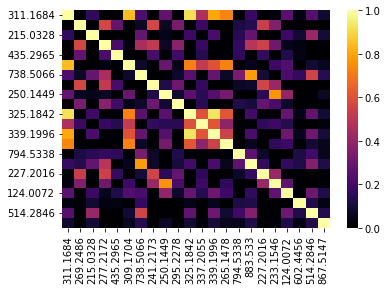

In [9]:
sns_heatmap(trainDEFSDf.corr())

In [10]:
def mz_corr(df, name):
    plt.rcParams['figure.figsize'] = [5.2, 5]
    plt.rcParams["figure.dpi"] = 600

    df_corr=df.corr()
    cor_matrix =df_corr.abs()
    upper_corr = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    return upper_corr

In [11]:
pd.set_option('display.max_columns', None)

In [13]:
mz_corr(trainDEFSDf, "trainDEFSDf")

,311.1684,269.2486,215.0328,277.2172,435.2965,309.1704,738.5066,241.2173,250.1449,295.2278,325.1842,337.2055,339.1996,265.1478,794.5338,883.533,227.2016,233.1546,124.0072,602.4456,514.2846,867.5147
311.1684,NaN,0.219546,0.162666,0.076569,0.140728,0.844843,0.228363,0.256720,0.273541,0.070839,0.919315,0.467246,0.808140,0.733161,0.025069,0.176920,0.206062,0.023752,0.259427,0.030507,0.247045,0.085004
269.2486,NaN,NaN,0.277911,0.565507,0.277704,0.005889,0.070243,0.566233,0.059412,0.332152,0.214727,0.183965,0.228573,0.064446,0.110205,0.136071,0.538450,0.352773,0.008718,0.016626,0.218205,0.009307
215.0328,NaN,NaN,NaN,0.125526,0.106446,0.031541,0.282990,0.295548,0.045234,0.138385,0.191268,0.164231,0.222411,0.009824,0.140914,0.279345,0.236567,0.222743,0.185998,0.088688,0.411016,0.097611
277.2172,NaN,NaN,NaN,NaN,0.221082,0.029081,0.456619,0.515723,0.063066,0.374376,0.064845,0.179237,0.073250,0.003319,0.170455,0.490607,0.543390,0.312220,0.047915,0.027867,0.075525,0.005208
435.2965,NaN,NaN,NaN,NaN,NaN,0.010098,0.016637,0.213738,0.307527,0.198979,0.129546,0.133748,0.134447,0.062241,0.156713,0.082485,0.165424,0.118914,0.121996,0.032279,0.160512,0.016438
309.1704,NaN,NaN,NaN,NaN,NaN,NaN,0.075795,0.025456,0.295243,0.043092,0.722585,0.522641,0.603849,0.724509,0.037105,0.049951,0.009231,0.191507,0.236847,0.009862,0.092076,0.057683
738.5066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001402,0.135185,0.074507,0.259467,0.014514,0.283772,0.068951,0.335915,0.784143,0.094936,0.182263,0.220236,0.173552,0.557886,0.138417
241.2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124026,0.306545,0.256385,0.168015,0.270805,0.083731,0.063802,0.076426,0.558304,0.412745,0.016895,0.040479,0.227343,0.015630
250.1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087628,0.256693,0.143665,0.248819,0.324326,0.309954,0.014211,0.148606,0.764114,0.395525,0.134352,0.004105,0.063353
295.2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063654,0.145129,0.072453,0.012137,0.122067,0.104567,0.281984,0.219945,0.070964,0.015936,0.103869,0.014630


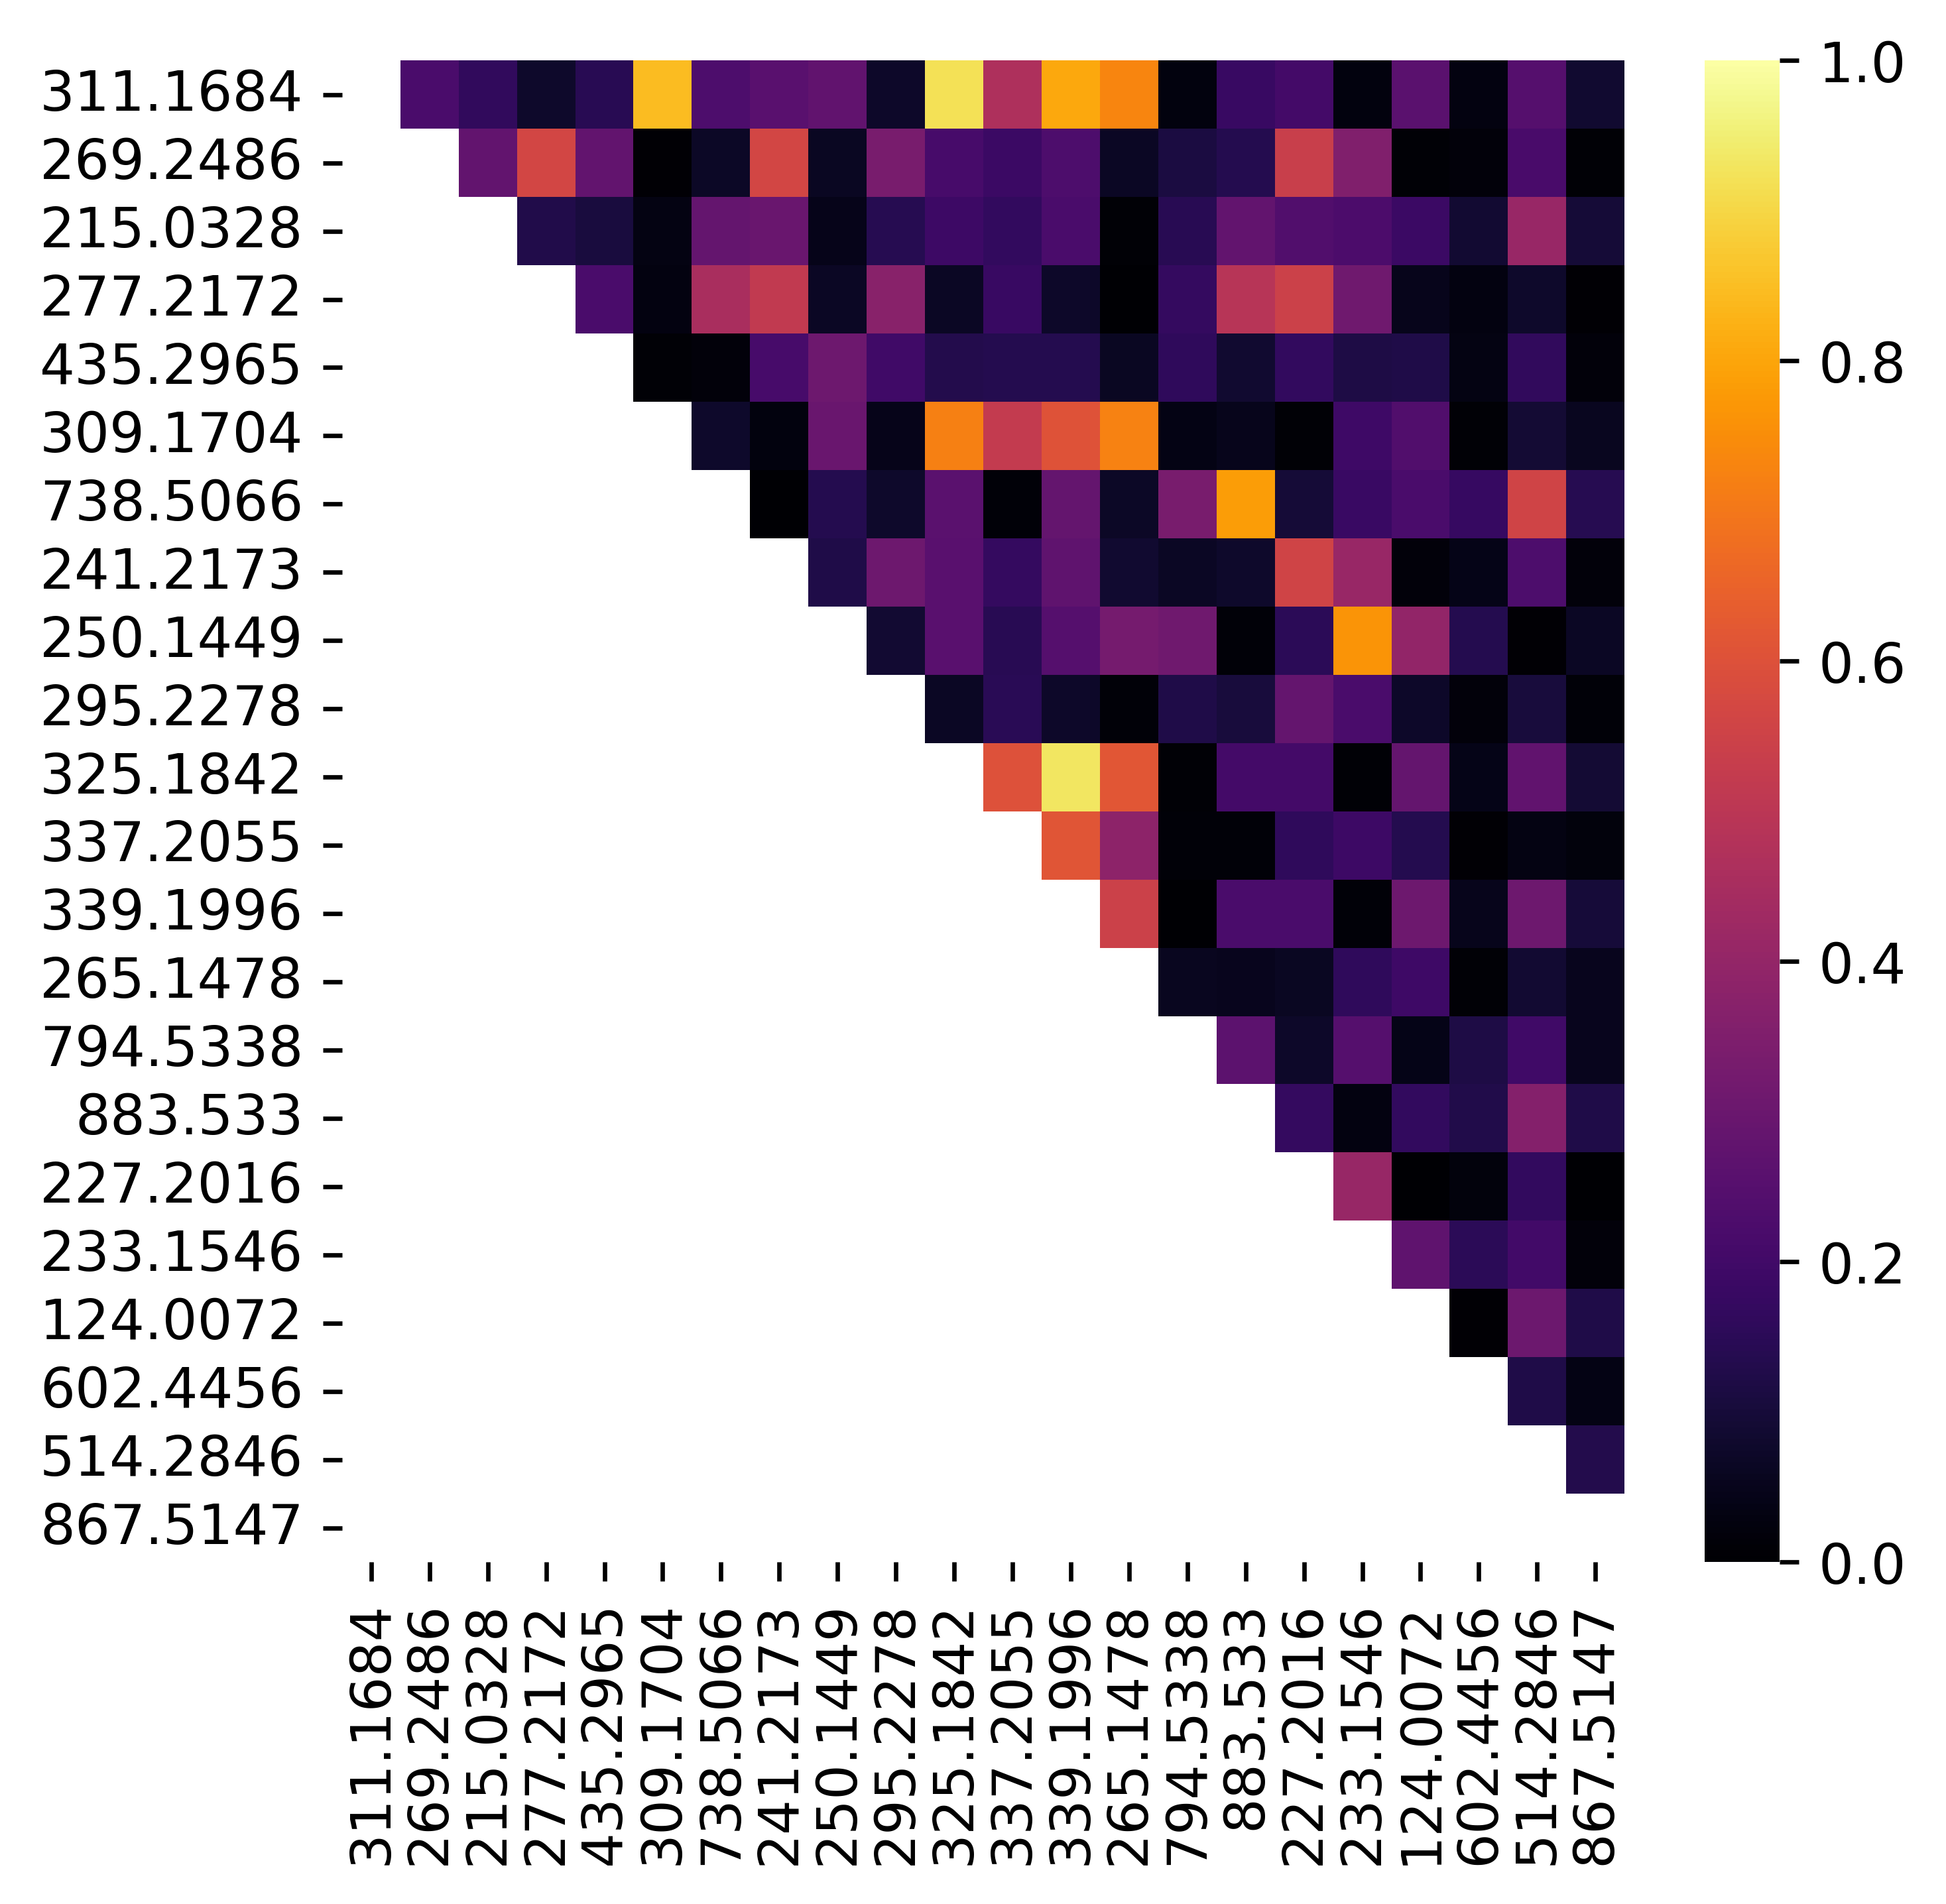

In [14]:
sns_heatmap(mz_corr(trainDEFSDf, "trainDEFSDf"))

In [15]:
mz_corr(extDEFSDf, "extDEFSDf")

,311.1684,269.2486,215.0328,277.2172,435.2965,309.1704,738.5066,241.2173,250.1449,295.2278,325.1842,337.2055,339.1996,265.1478,794.5338,883.533,227.2016,233.1546,124.0072,602.4456,514.2846,867.5147
311.1684,NaN,0.497191,0.177764,0.386501,0.199836,0.242559,0.373282,0.540088,0.544888,0.393221,0.964591,0.070673,0.856371,0.553473,0.293183,0.462534,0.546548,0.438842,0.048690,0.328234,0.335899,0.453973
269.2486,NaN,NaN,0.018466,0.923778,0.681051,0.066010,0.775225,0.965562,0.795645,0.890591,0.586249,0.031754,0.724416,0.405296,0.661865,0.847872,0.941393,0.756534,0.332824,0.761794,0.564749,0.711541
215.0328,NaN,NaN,NaN,0.173833,0.555018,0.035541,0.188827,0.017792,0.141792,0.137584,0.219794,0.014997,0.255507,0.285705,0.334297,0.090495,0.021220,0.060624,0.798983,0.012621,0.304271,0.088890
277.2172,NaN,NaN,NaN,NaN,0.772826,0.023456,0.755630,0.904436,0.714484,0.961981,0.458367,0.013477,0.580171,0.263610,0.720026,0.716351,0.878972,0.734678,0.392484,0.789937,0.463650,0.570513
435.2965,NaN,NaN,NaN,NaN,NaN,0.005501,0.683253,0.670612,0.444360,0.755736,0.234323,0.007525,0.305264,0.084345,0.638524,0.633073,0.680546,0.609063,0.744521,0.556347,0.577552,0.498086
309.1704,NaN,NaN,NaN,NaN,NaN,NaN,0.069826,0.087090,0.118096,0.046158,0.249488,0.308154,0.240611,0.357739,0.001456,0.097718,0.102096,0.099975,0.007438,0.033762,0.051151,0.096726
738.5066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830782,0.692210,0.783054,0.428119,0.020075,0.525390,0.241794,0.763314,0.772754,0.865870,0.863281,0.462284,0.682080,0.595341,0.584822
241.2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.822882,0.894682,0.623485,0.035842,0.743237,0.431087,0.679010,0.858118,0.979368,0.817094,0.336111,0.764178,0.566436,0.705696
250.1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694637,0.630257,0.028115,0.743803,0.457517,0.550415,0.751129,0.839253,0.780306,0.140073,0.629412,0.366298,0.616780
295.2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.461103,0.022302,0.573223,0.280810,0.714772,0.700540,0.877957,0.770422,0.371923,0.798196,0.472768,0.543112


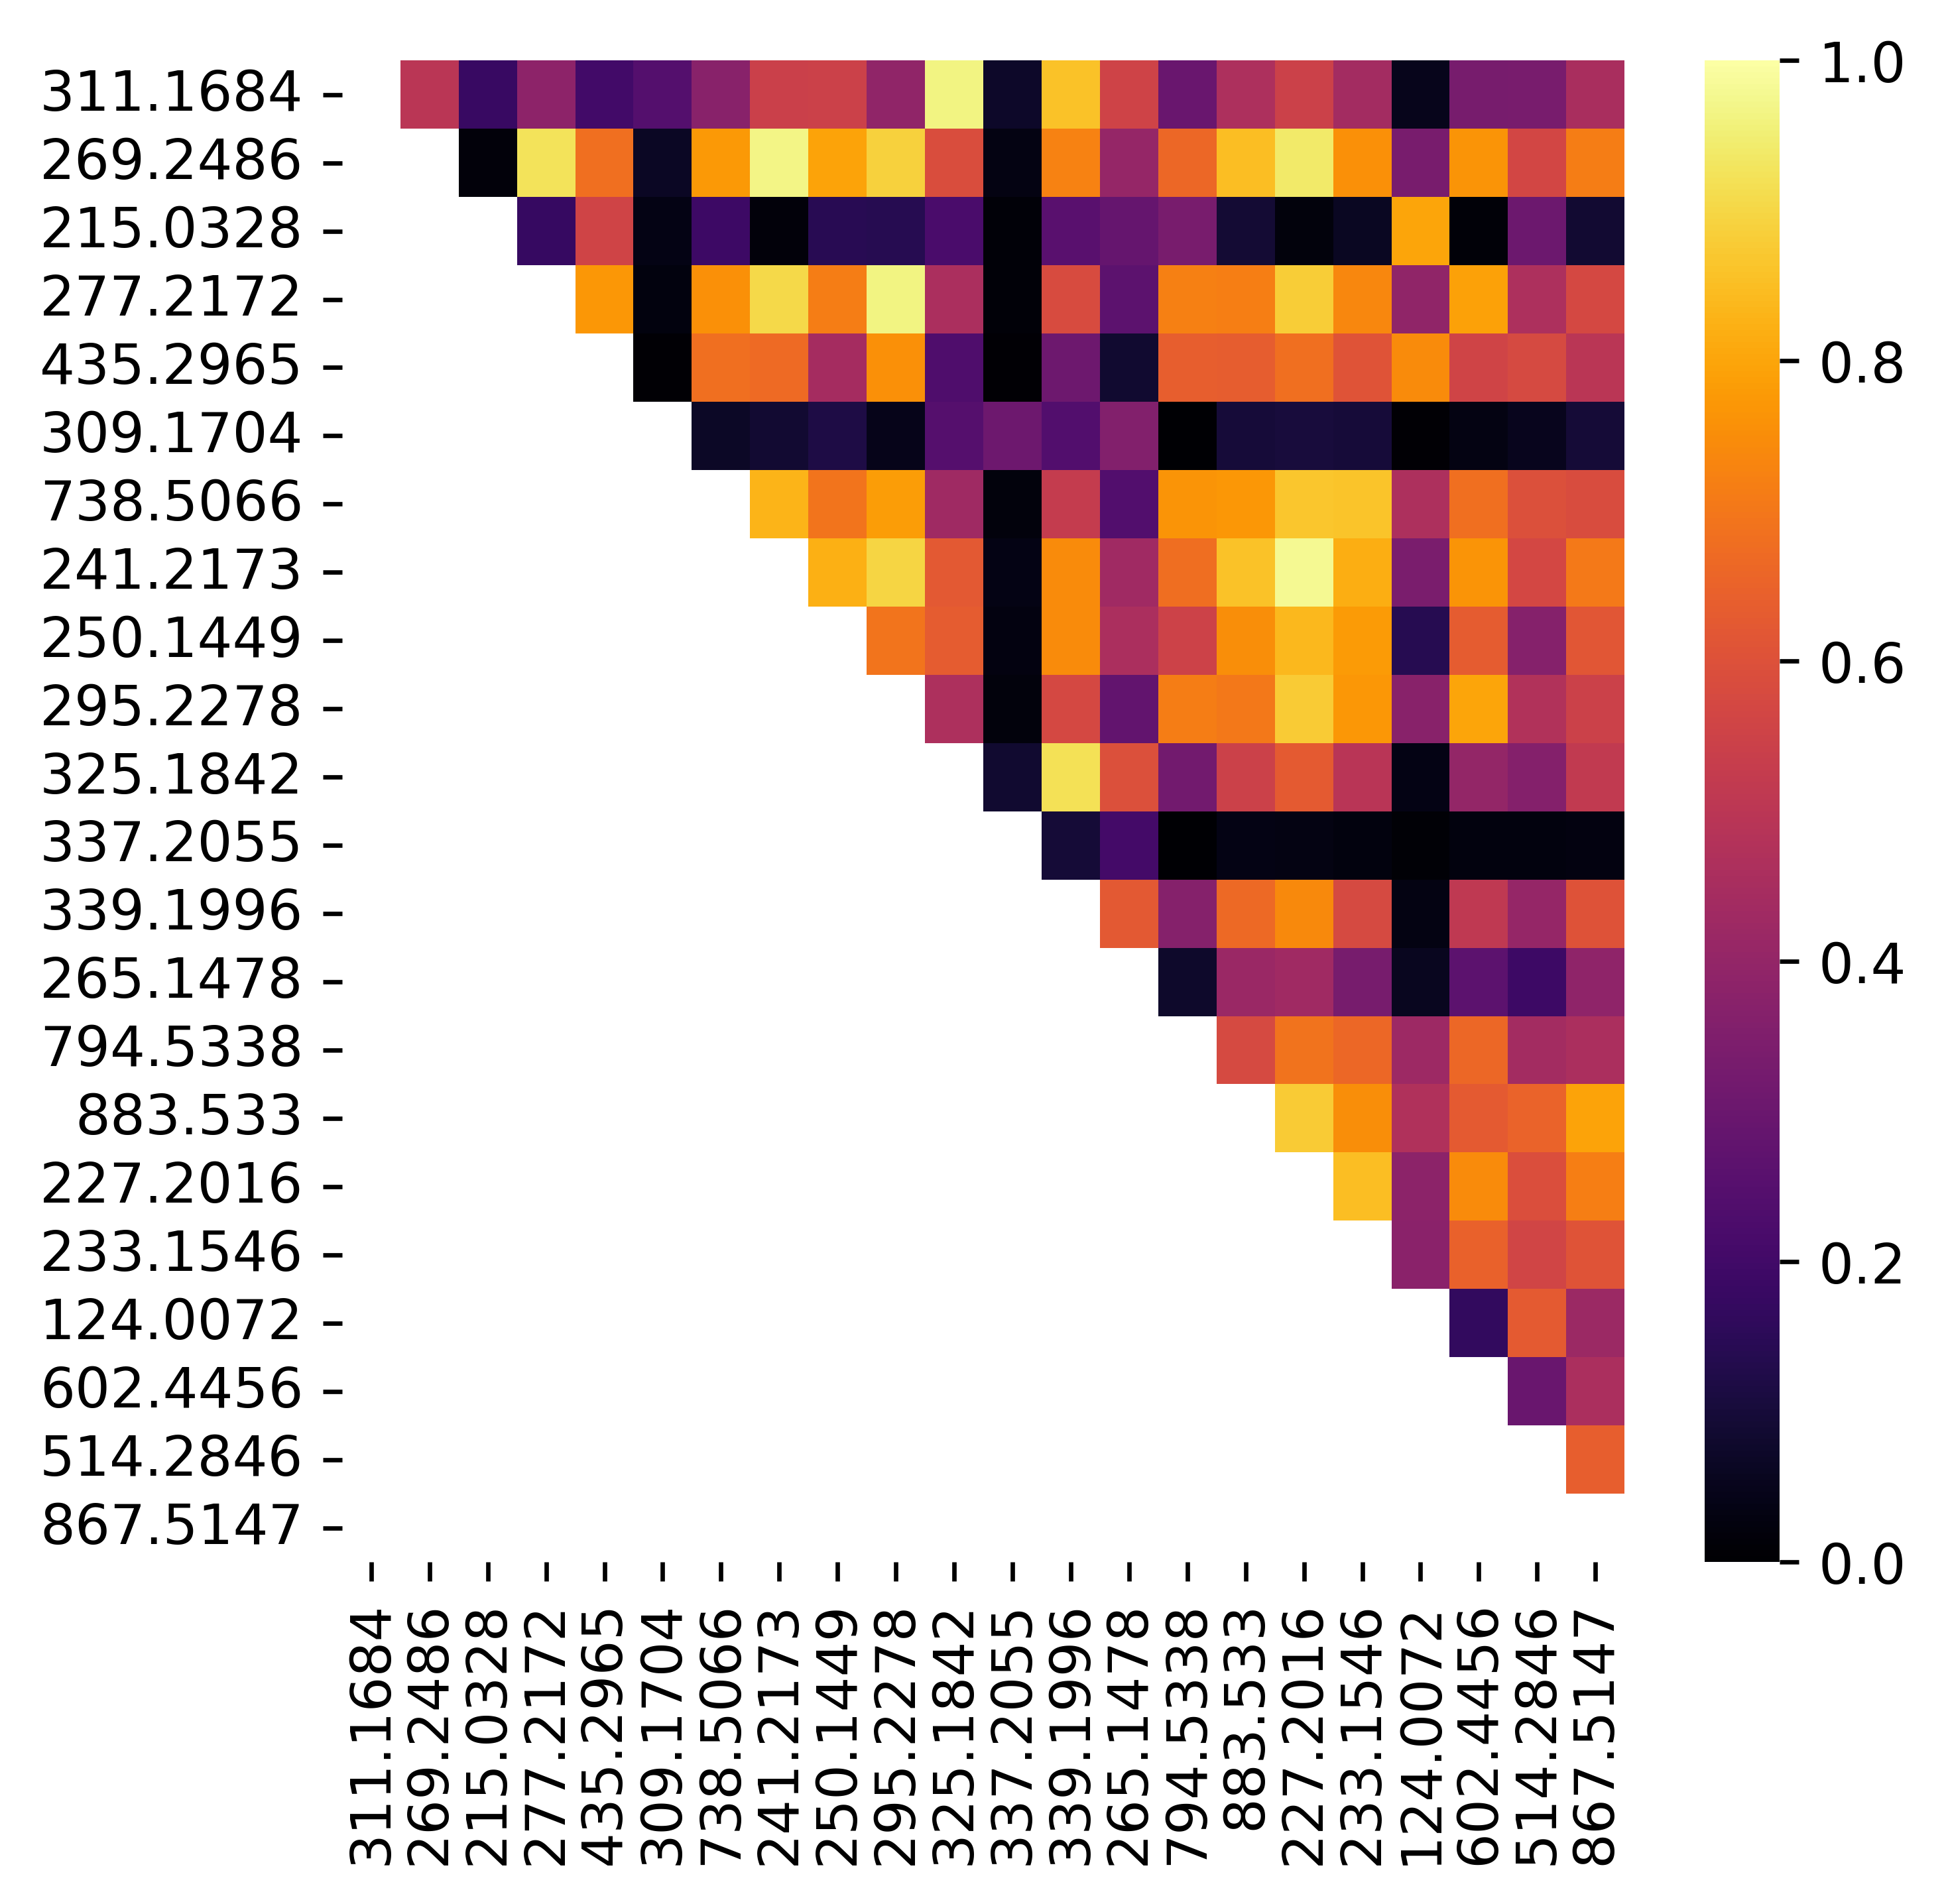

In [16]:
sns_heatmap(mz_corr(extDEFSDf, "extDEFSDf"))

In [17]:
mz_corr(fnaDEFSDf, "fnaDEFSDf")

,311.1684,269.2486,215.0328,277.2172,435.2965,309.1704,738.5066,241.2173,250.1449,295.2278,325.1842,337.2055,339.1996,265.1478,794.5338,883.533,227.2016,233.1546,124.0072,602.4456,514.2846,867.5147
311.1684,NaN,0.121267,0.030305,0.115838,0.115148,0.249779,0.024454,0.159008,0.264824,0.056167,0.694053,0.418494,0.555098,0.685689,0.094480,0.043664,0.165416,0.125158,0.086468,0.024380,0.089680,0.097050
269.2486,NaN,NaN,0.498039,0.428317,0.393612,0.336038,0.203228,0.420440,0.471062,0.629634,0.108430,0.066407,0.085326,0.126118,0.410162,0.068382,0.406293,0.448093,0.378277,0.072775,0.471532,0.023281
215.0328,NaN,NaN,NaN,0.659300,0.624200,0.288202,0.441671,0.179289,0.084951,0.650774,0.029526,0.007722,0.000215,0.025548,0.613440,0.305942,0.126302,0.196388,0.725536,0.060036,0.761981,0.017700
277.2172,NaN,NaN,NaN,NaN,0.652728,0.245018,0.525135,0.080245,0.066919,0.582050,0.093397,0.039738,0.058754,0.211972,0.728358,0.338320,0.029735,0.163489,0.473341,0.021545,0.509093,0.042778
435.2965,NaN,NaN,NaN,NaN,NaN,0.249033,0.362203,0.141640,0.002830,0.511617,0.088317,0.029435,0.049995,0.218344,0.603481,0.185529,0.104004,0.167066,0.532674,0.014868,0.552156,0.106069
309.1704,NaN,NaN,NaN,NaN,NaN,NaN,0.074166,0.196896,0.241672,0.360772,0.250145,0.194801,0.204713,0.241260,0.214450,0.035807,0.165389,0.241296,0.125739,0.032166,0.247013,0.005569
738.5066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057362,0.037124,0.289365,0.012631,0.001596,0.012426,0.059046,0.413302,0.550157,0.048323,0.158417,0.414082,0.012038,0.408800,0.145620
241.2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629953,0.356107,0.139462,0.088681,0.114623,0.169692,0.040552,0.006033,0.545584,0.511237,0.227446,0.076487,0.294232,0.098433
250.1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370306,0.238082,0.132655,0.187330,0.280985,0.079870,0.159307,0.695541,0.704462,0.127737,0.100115,0.255519,0.170826
295.2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042543,0.026780,0.030906,0.057337,0.553950,0.058737,0.309315,0.403031,0.461041,0.074158,0.549623,0.004833


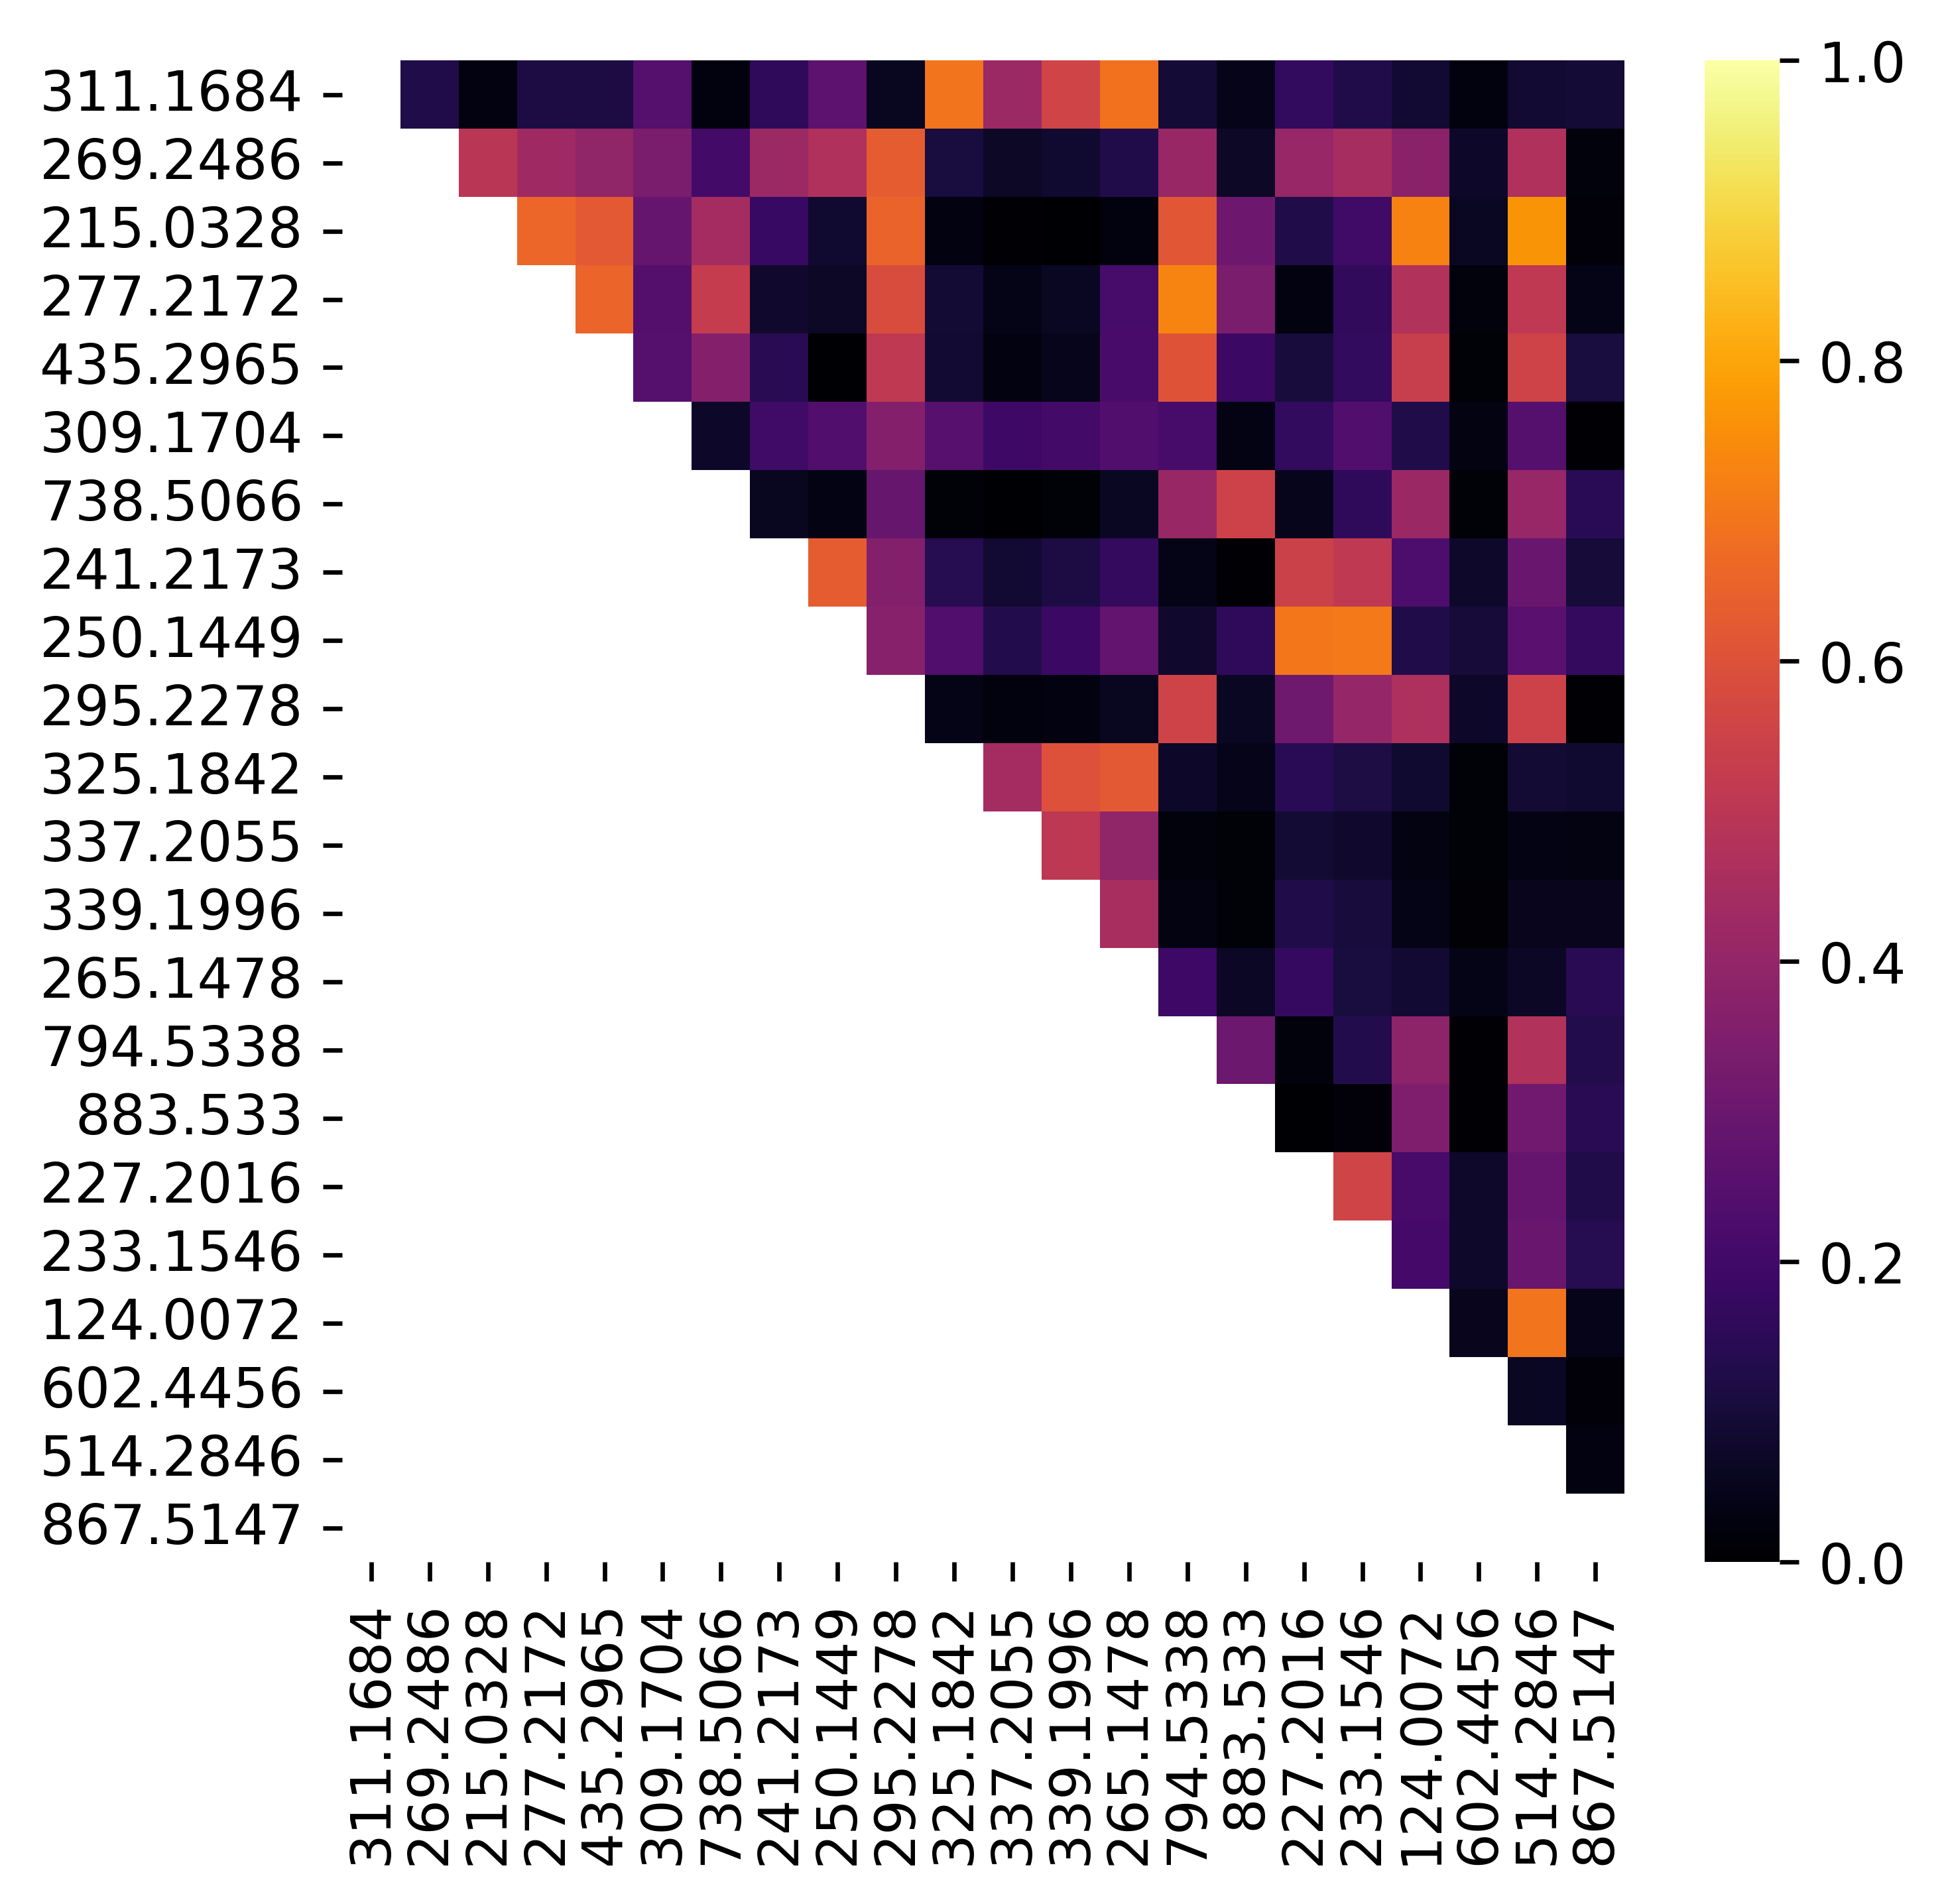

In [18]:
sns_heatmap(mz_corr(fnaDEFSDf, "fnaDEFSDf"))

In [19]:
mz_corr(ingestedDEFSDf, "ingestedDEFSDf")

,311.1684,269.2486,215.0328,277.2172,435.2965,309.1704,738.5066,241.2173,250.1449,295.2278,325.1842,337.2055,339.1996,265.1478,794.5338,883.533,227.2016,233.1546,124.0072,602.4456,514.2846,867.5147
311.1684,NaN,0.121716,0.096329,0.018968,0.125558,0.828052,0.227268,0.158781,0.238525,0.010910,0.919873,0.460960,0.808177,0.731171,0.004611,0.148049,0.102188,0.035058,0.156314,0.046048,0.214783,0.090433
269.2486,NaN,NaN,0.029865,0.714911,0.279084,0.090003,0.171253,0.770908,0.414689,0.673297,0.116450,0.072143,0.135181,0.028420,0.535234,0.565927,0.774106,0.554580,0.423237,0.521376,0.243671,0.387014
215.0328,NaN,NaN,NaN,0.110410,0.056972,0.062739,0.226307,0.011849,0.151169,0.142424,0.109080,0.134617,0.118547,0.023401,0.328333,0.298239,0.090720,0.011689,0.547100,0.168319,0.421447,0.203546
277.2172,NaN,NaN,NaN,NaN,0.305720,0.028852,0.468567,0.647984,0.301732,0.704444,0.006119,0.088984,0.010846,0.013644,0.484557,0.642320,0.650831,0.434460,0.357807,0.550842,0.222441,0.297618
435.2965,NaN,NaN,NaN,NaN,NaN,0.010201,0.060954,0.222196,0.207745,0.258988,0.113304,0.125706,0.115203,0.056494,0.186907,0.057490,0.174698,0.053974,0.204892,0.144016,0.057479,0.047188
309.1704,NaN,NaN,NaN,NaN,NaN,NaN,0.069332,0.107640,0.154786,0.053579,0.708991,0.528069,0.596813,0.713513,0.119571,0.046735,0.110202,0.087658,0.044234,0.080067,0.000920,0.027114
738.5066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106089,0.048892,0.213039,0.259014,0.012415,0.285380,0.071723,0.328153,0.632143,0.167288,0.076366,0.219655,0.256904,0.497261,0.184126
241.2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454642,0.631892,0.158137,0.064109,0.180730,0.046906,0.505864,0.512685,0.785096,0.601995,0.408921,0.473751,0.226360,0.369632
250.1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.412987,0.223495,0.063544,0.203767,0.271548,0.227708,0.364176,0.513213,0.825639,0.520447,0.310897,0.295805,0.351549
295.2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004072,0.036458,0.016395,0.022744,0.565772,0.548251,0.652366,0.464263,0.462842,0.604978,0.305899,0.383239


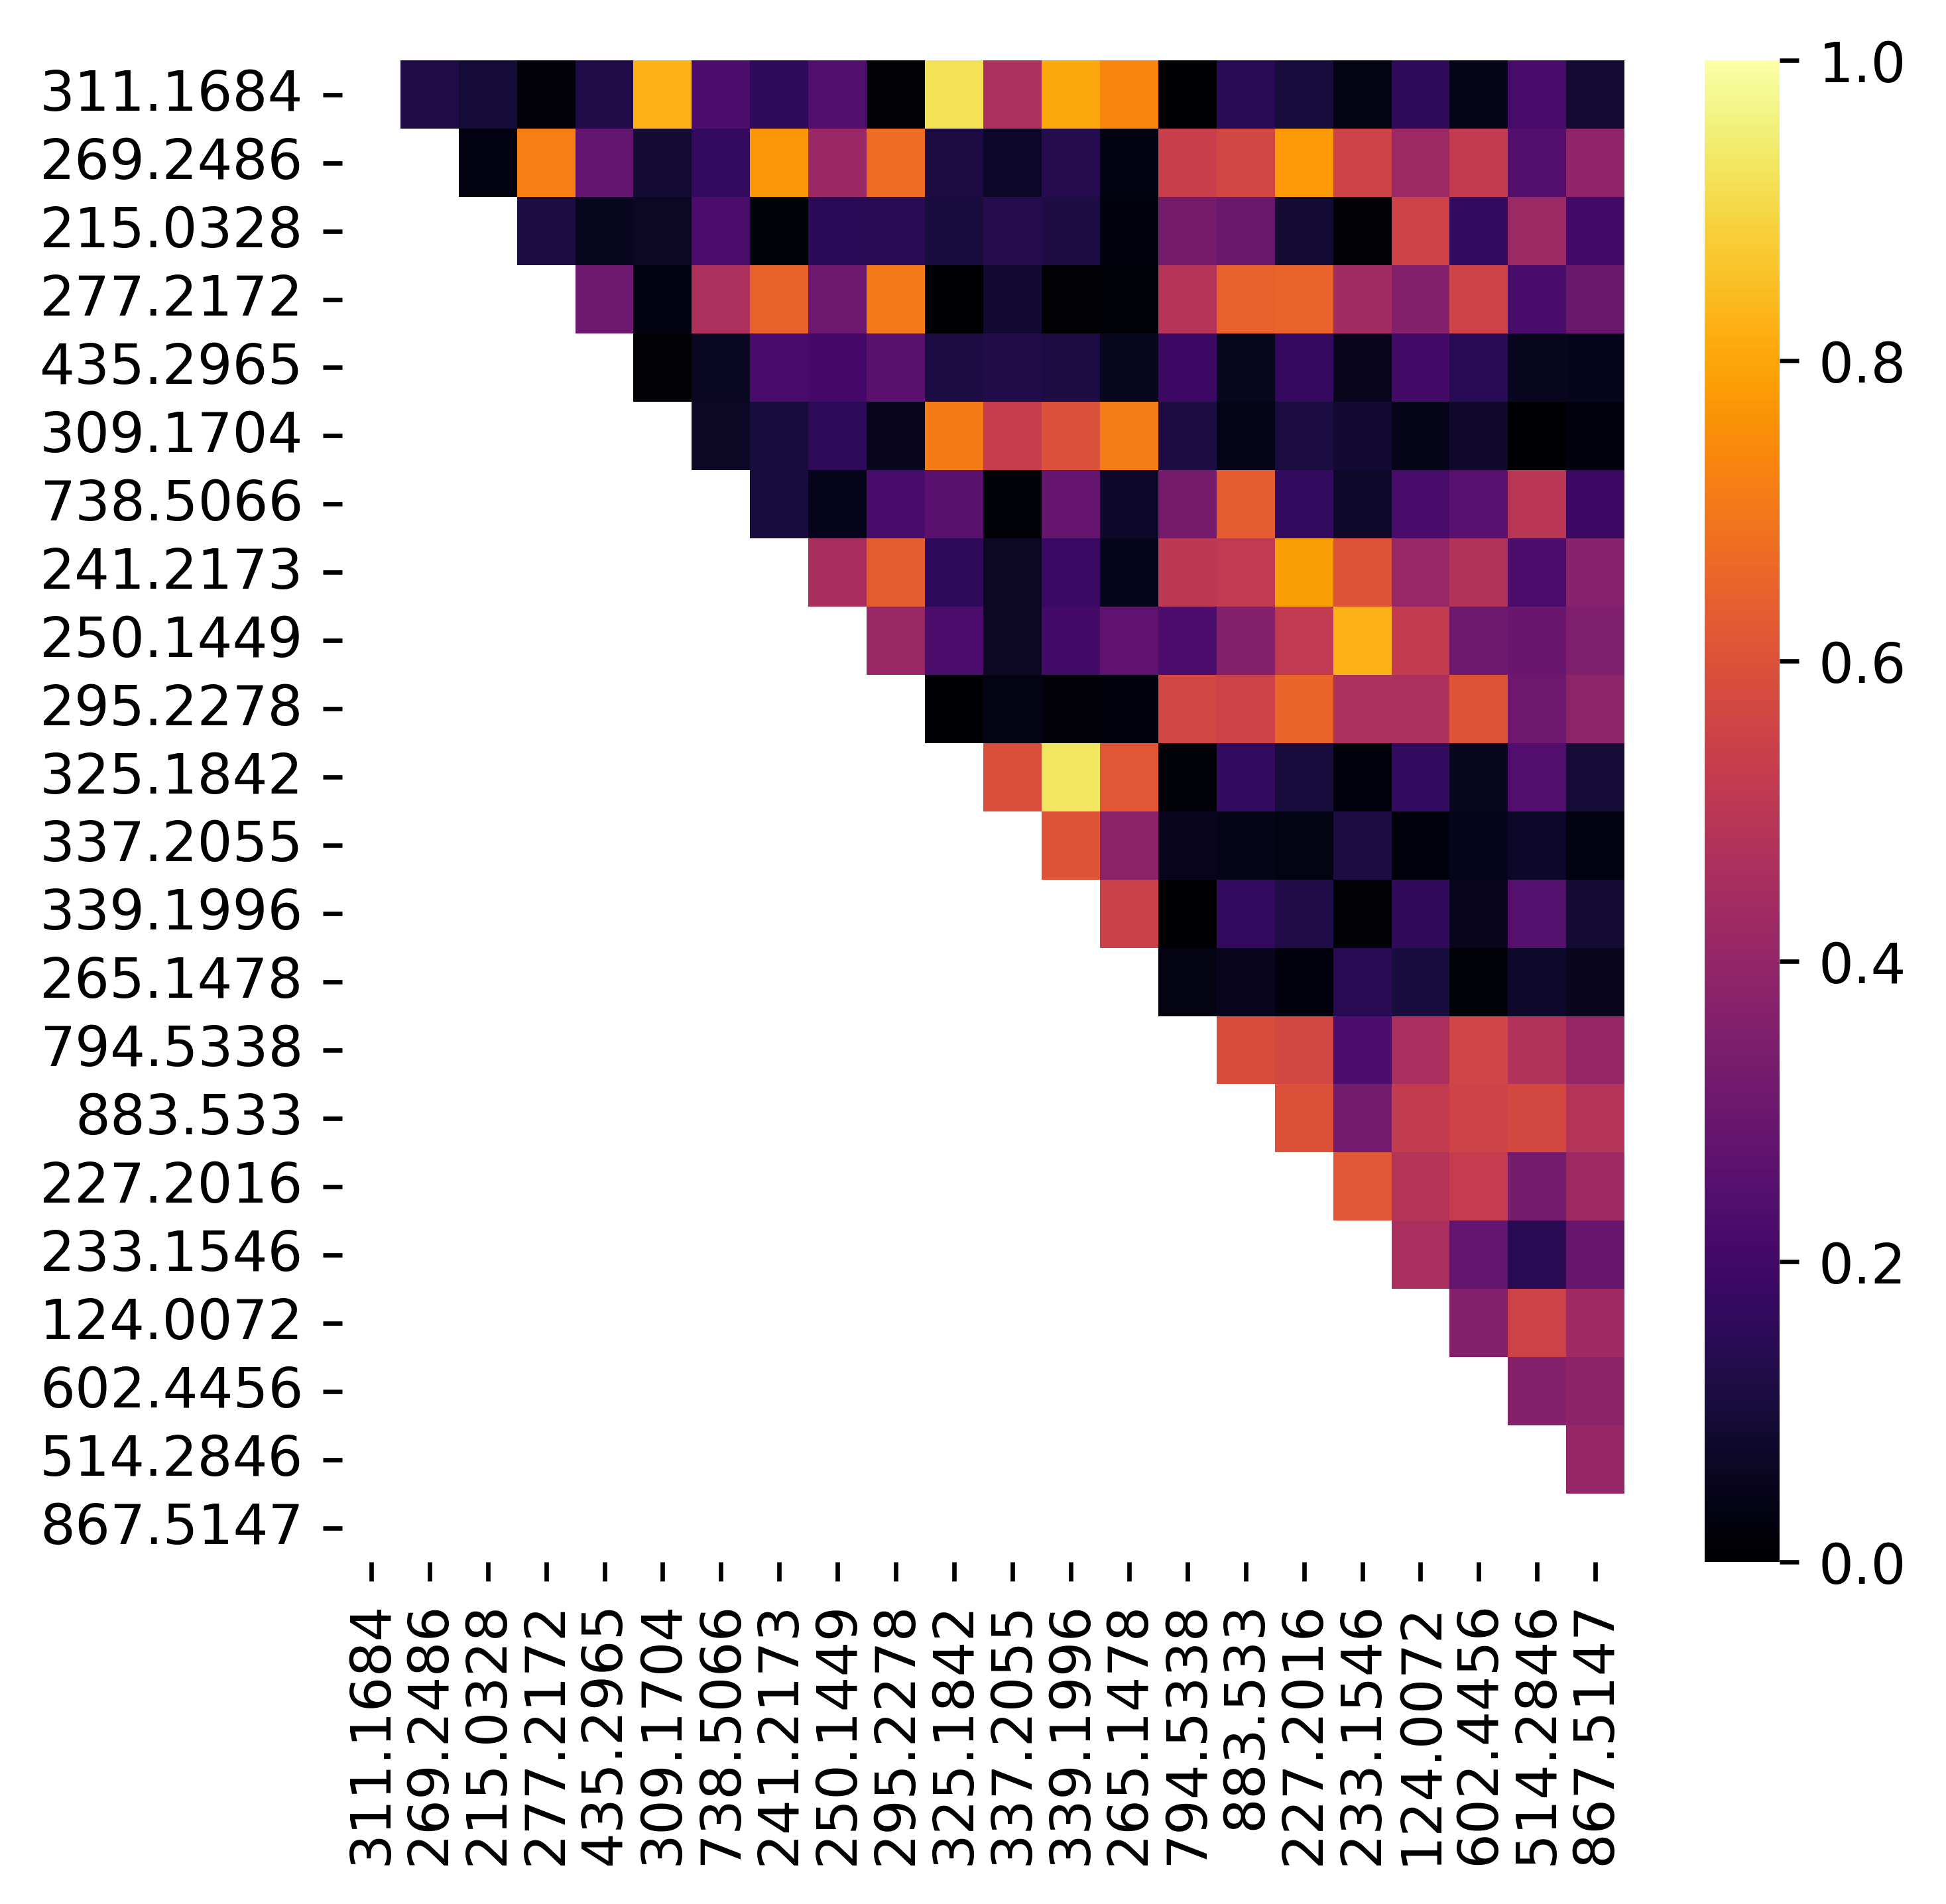

In [20]:
sns_heatmap(mz_corr(ingestedDEFSDf, "ingestedDEFSDf"))

In [21]:
mz_corr(diDEFSDf, "diDEFSDf")

,311.1684,269.2486,215.0328,277.2172,435.2965,309.1704,738.5066,241.2173,250.1449,295.2278,325.1842,337.2055,339.1996,265.1478,794.5338,883.533,227.2016,233.1546,124.0072,602.4456,514.2846,867.5147
311.1684,NaN,0.406679,0.032098,0.319070,0.424452,0.441903,0.245538,0.390110,0.219603,0.172548,0.978378,0.478527,0.915732,0.429604,0.011115,0.256626,0.406412,0.229401,0.138718,0.126357,0.256395,0.197134
269.2486,NaN,NaN,0.159620,0.567615,0.442252,0.623420,0.447457,0.829359,0.710639,0.520350,0.512519,0.695820,0.600354,0.568008,0.140181,0.221403,0.772920,0.704087,0.110779,0.116514,0.078304,0.006164
215.0328,NaN,NaN,NaN,0.228099,0.180834,0.053473,0.264822,0.109904,0.132999,0.149234,0.043727,0.007930,0.053872,0.081454,0.453097,0.181278,0.184919,0.155323,0.303619,0.218106,0.102603,0.139288
277.2172,NaN,NaN,NaN,NaN,0.349245,0.459216,0.280471,0.519116,0.249165,0.730386,0.410491,0.480667,0.494523,0.491087,0.172359,0.179461,0.609619,0.278253,0.180996,0.016724,0.053609,0.007088
435.2965,NaN,NaN,NaN,NaN,NaN,0.333187,0.224012,0.525249,0.273079,0.265488,0.443347,0.385448,0.453010,0.350586,0.064958,0.240847,0.641968,0.303852,0.666171,0.147644,0.013936,0.221661
309.1704,NaN,NaN,NaN,NaN,NaN,NaN,0.493259,0.616567,0.634231,0.352974,0.563840,0.918543,0.667198,0.966452,0.015191,0.378820,0.500311,0.606196,0.035435,0.063684,0.141969,0.113478
738.5066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.378621,0.550457,0.048225,0.329623,0.544314,0.418414,0.388895,0.475368,0.651256,0.259922,0.505692,0.056584,0.085542,0.281599,0.343698
241.2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.720203,0.445694,0.492196,0.696578,0.575937,0.579716,0.140504,0.216970,0.850287,0.726063,0.234469,0.084969,0.153419,0.036717
250.1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061745,0.341641,0.728753,0.445825,0.504073,0.242322,0.292133,0.553785,0.901315,0.056735,0.134850,0.225954,0.070380
295.2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246646,0.339548,0.326193,0.413765,0.032997,0.025540,0.574700,0.127772,0.234162,0.112378,0.142515,0.031386


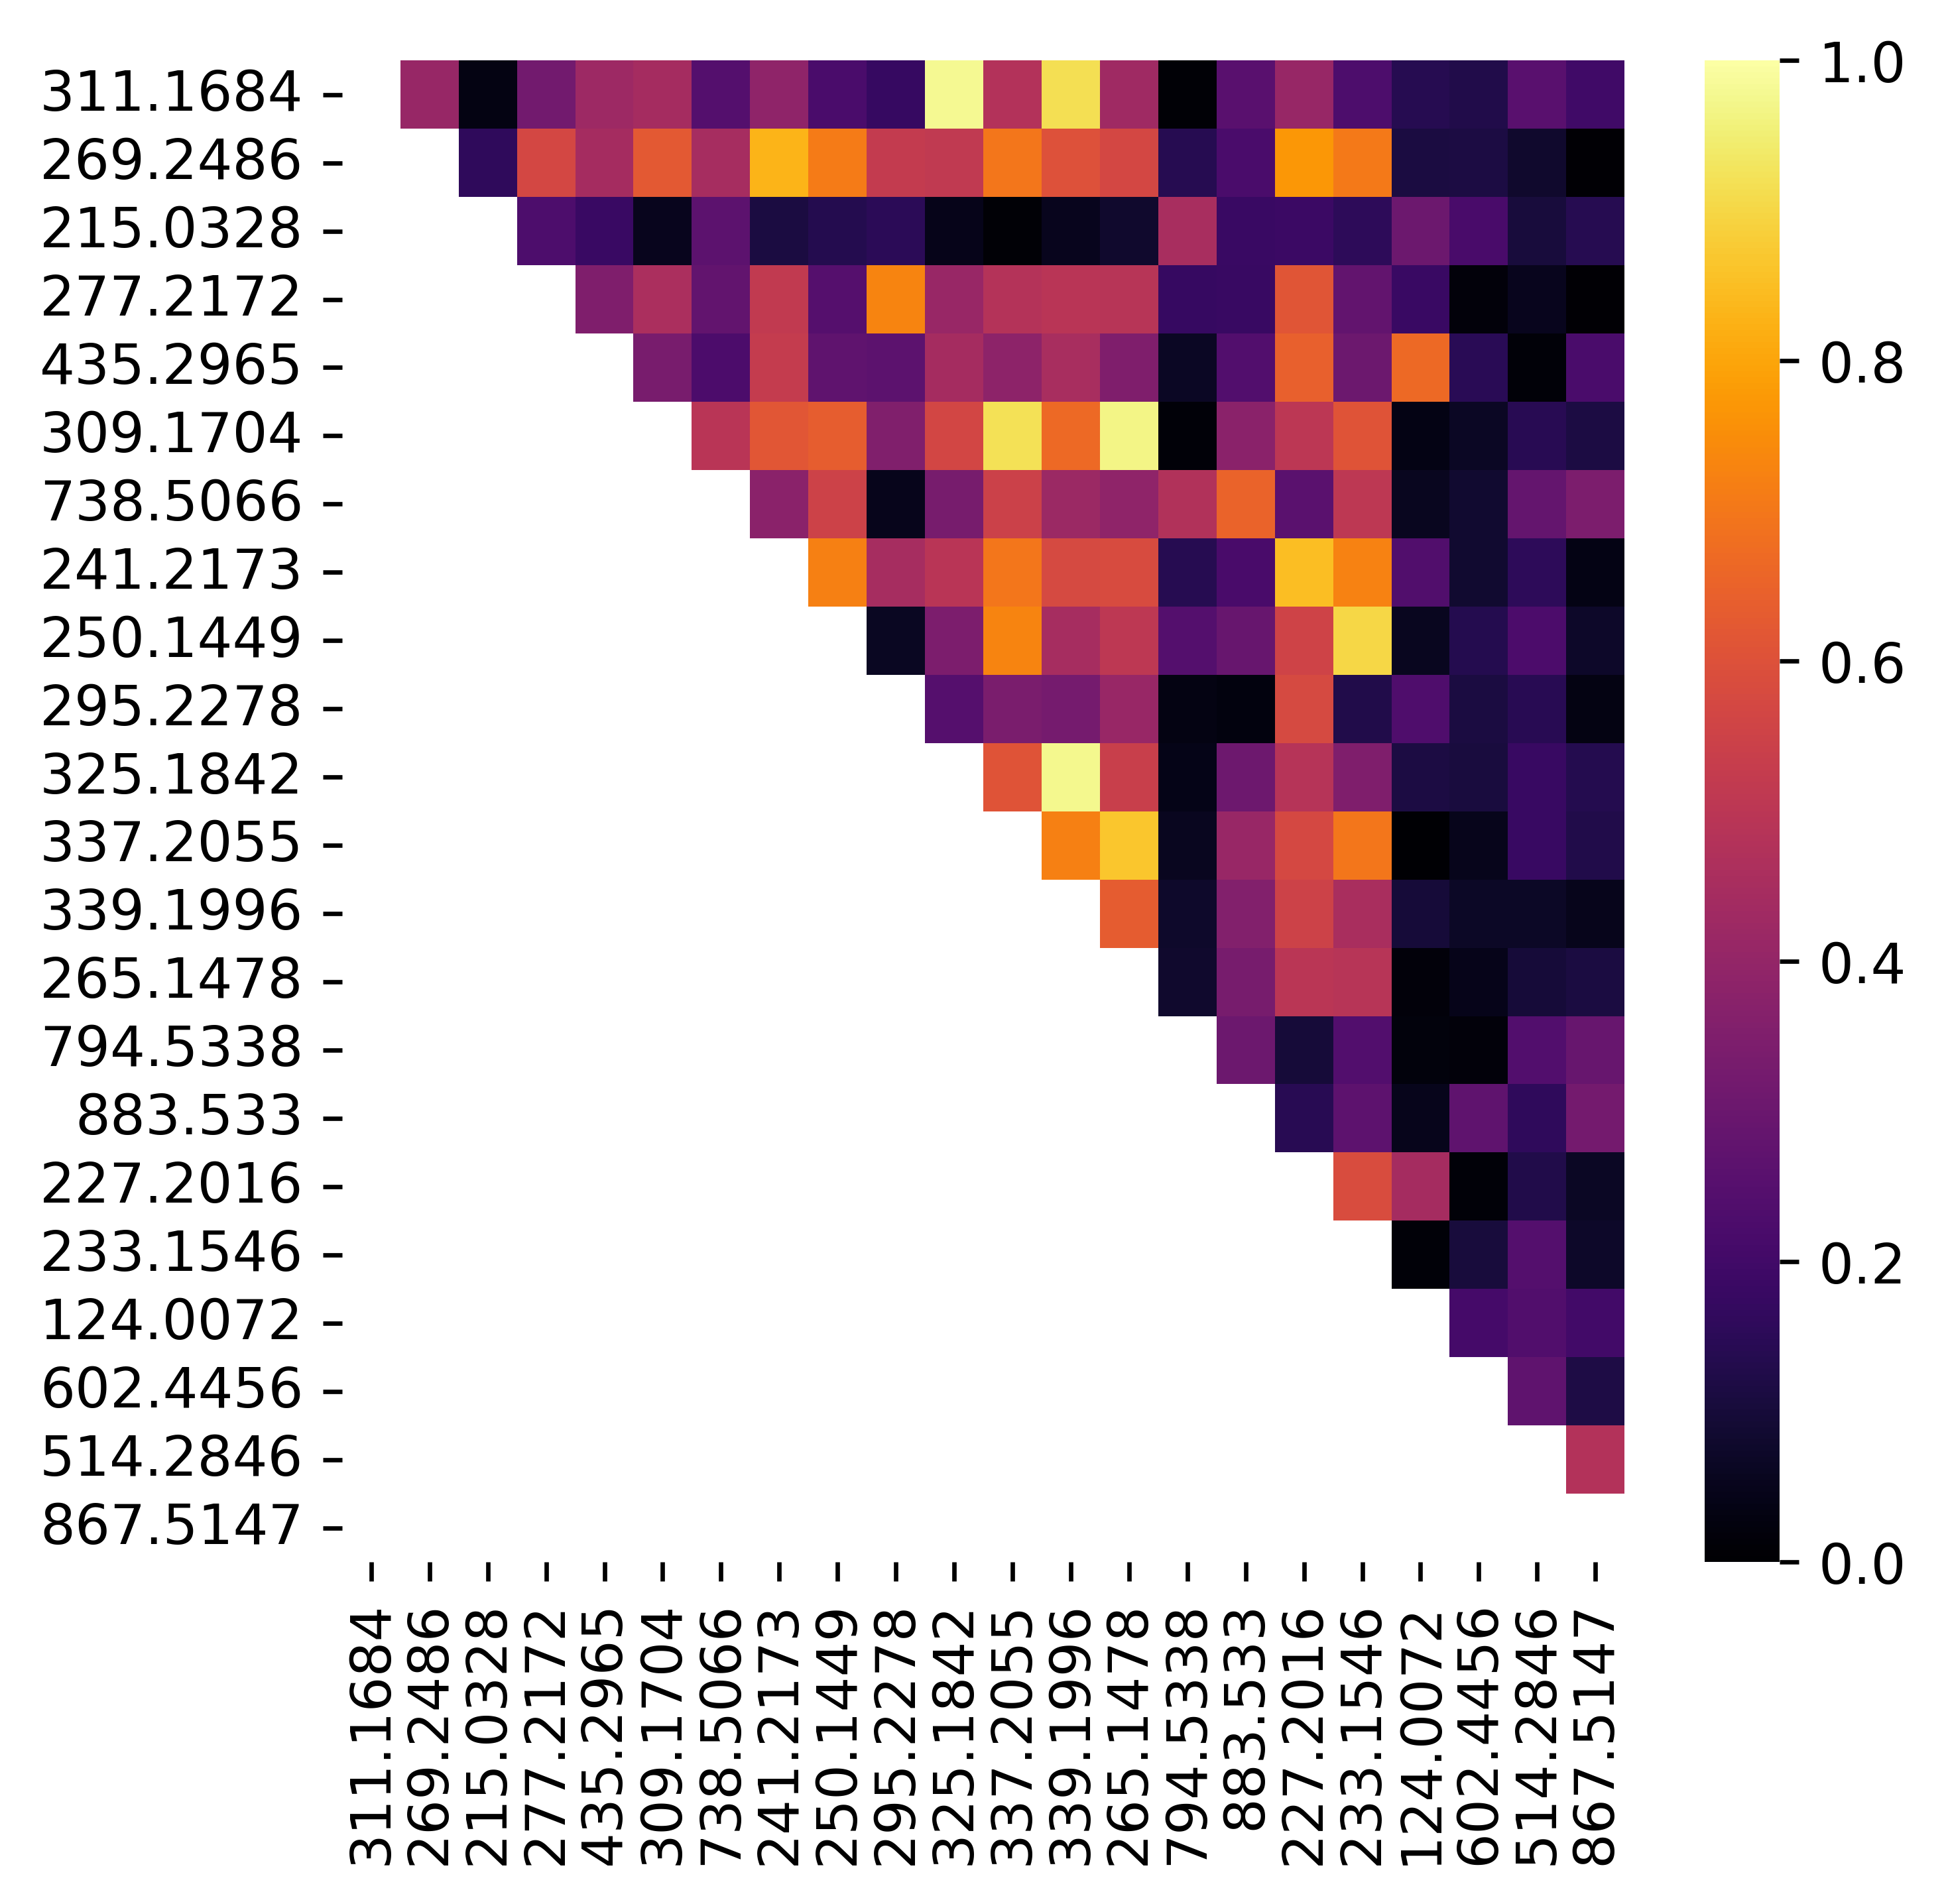

In [22]:
sns_heatmap(mz_corr(diDEFSDf, "diDEFSDf"))